In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load data

%cd ..
path = './training/'

netflix = pd.read_csv(path+'netflix_titles.csv')

print(f'DataFrame Details\n')
print(f'Total Rows: {netflix.shape[0]}\nTotal Columns: {netflix.shape[1]}')
display(netflix.head())

C:\Users\uran5
DataFrame Details

Total Rows: 7787
Total Columns: 12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# remove NaN
netflix = netflix.drop(netflix[netflix.isnull().any(axis=1)].index)

# add column for year added and age
netflix['year_added'] = netflix['date_added'].apply(lambda x: str(x)[-4:])
netflix['year_added'] = netflix['year_added'].astype('int64')
netflix['show_age'] = 2021 - netflix['year_added']
netflix['show_age'] = netflix['show_age'].apply(lambda x: str(x)+' year')

# drop extra columns
netflix.drop(['show_id','date_added','description'],axis=1,inplace=True)

print('Data processing done')
display(netflix.head())

Data processing done


,type,title,director,cast,country,release_year,rating,duration,listed_in,year_added,show_age
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",2016,5 year
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",2018,3 year
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,4 year
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,2020,1 year
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",2017,4 year


#### Data Analysis

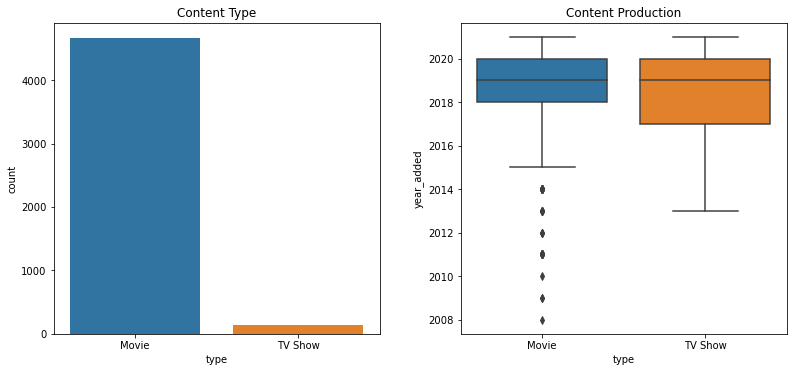

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.tight_layout(pad=5)

sns.countplot(data=netflix,x='type',ax=ax[0])
ax[0].set_title('Content Type')
sns.boxplot(x='type',y='year_added',data=netflix,ax=ax[1])
ax[1].set_title('Content Production')
plt.show()

<AxesSubplot:title={'center':'Content Age'}>

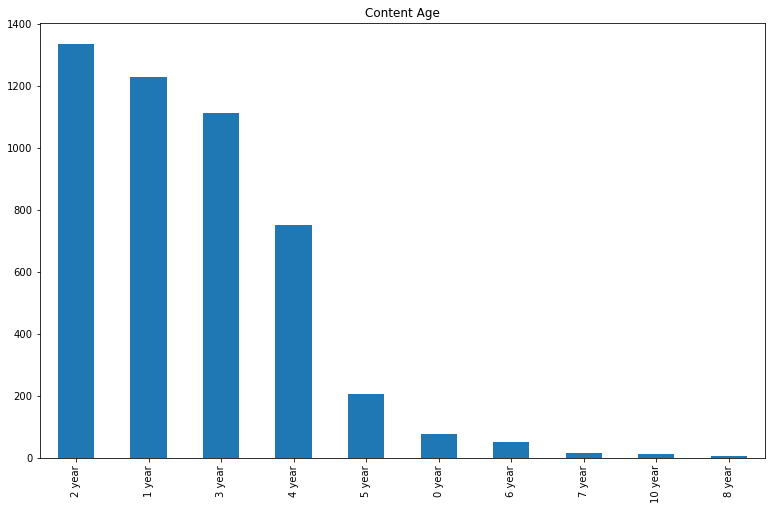

In [5]:
age = netflix['show_age'].value_counts()[:10]
age.plot(kind='bar',title='Content Age',figsize=(13,8))

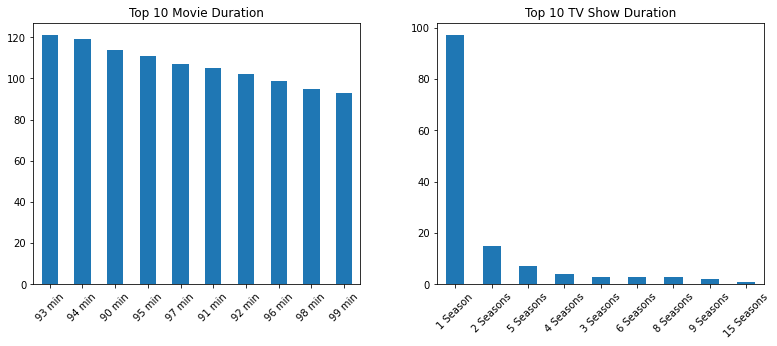

In [6]:
plt.figure(figsize=(12,6))
types = list(netflix.type.unique())

for i in range(len(types)):
    plt.subplot(1,2,i+1)
    if types[i] == 'Movie':
        movies = netflix[netflix.type == types[i]]
        movies = movies.duration.value_counts()[:10]
        movies.plot(kind='bar')
    elif types[i] == 'TV Show':
        tv_show = netflix[netflix.type == types[i]]
        tv_show = tv_show.duration.value_counts()[:10]
        tv_show.plot(kind='bar')
    plt.title(f'Top 10 {types[i]} Duration')
    plt.xticks(rotation=45)
    
plt.tight_layout(pad=5)

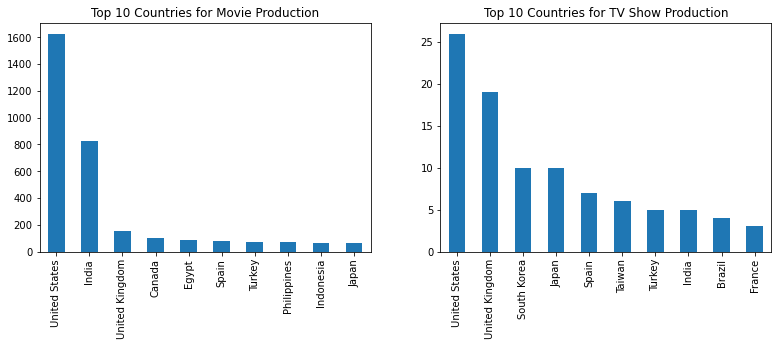

In [7]:
plt.figure(figsize=(12,6))

for i in range(len(types)):
    plt.subplot(1,2,i+1)
    if types[i] == 'Movie':
        movies = netflix[netflix.type == 'Movie']
        movies = movies.country.value_counts()[:10]
        movies.plot(kind='bar',title=f'Top 10 Countries for {types[i]} Production')
    elif types[i] == 'TV Show':
        tv_show = netflix[netflix.type == 'TV Show']
        tv_show = tv_show.country.value_counts()[:10]
        tv_show.plot(kind='bar',title=f'Top 10 Countries for {types[i]} Production')

plt.tight_layout(pad=5)

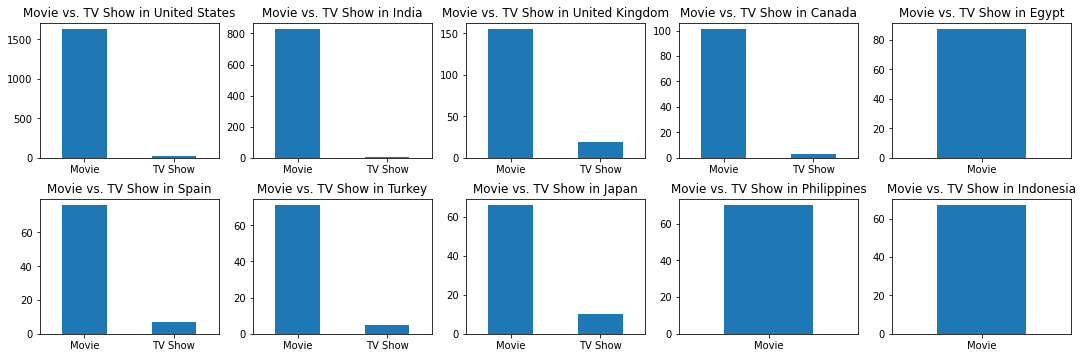

In [8]:
plt.figure(figsize=(15,5))

countries = netflix.country.value_counts()[:10].index
for i in range(len(countries)):
    plt.subplot(2,5,i+1)
    x = netflix[netflix.country == countries[i]]
    x = x.type.value_counts()
    x.plot(kind='bar')
    plt.title(f'Movie vs. TV Show in {countries[i]}')
    plt.xticks(rotation=360)
    
plt.tight_layout(pad=.8)

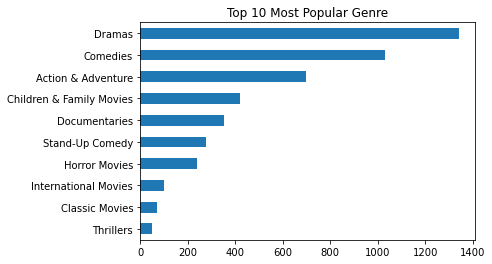

In [9]:
nflx = netflix.copy()
nflx['listed_in'] = nflx['listed_in'].apply(lambda x: x.split(',')[0])

genre = nflx.listed_in.value_counts()[:10]
genre.sort_values().plot(kind='barh',title='Top 10 Most Popular Genre')
plt.show()

## Find Top Movies Based on their Ratings

Use following formula to calculate weighted rating:

$$ wr = \frac{v}{v+m}R + \frac{m}{v+m}C  $$

where  
v = number of votes on the movie  
m = minimum number of votes to be in the top 50  
R = average/mean rating of the movie  
C = mean rating across the whole dataset (5.9 in this dataset)

In [10]:
### Data pre-processing

# create df for movies only
nf_movies = netflix[netflix.type == 'Movie'][['title','country','release_year','listed_in']]
nf_movies.rename(columns={'release_year':'year'},inplace=True)

# load imdb ratings and movies datasets
imdb_movies = pd.read_csv(path+'IMDb movies.csv')[['imdb_title_id','title','year']]
imdb_ratings = pd.read_csv(path+'IMDb ratings.csv')

imdb = imdb_movies.merge(imdb_ratings,on=['imdb_title_id'])

imdb = imdb[['title', 'year', 'weighted_average_vote', 'allgenders_0age_avg_vote', 'allgenders_0age_votes', 
             'allgenders_18age_avg_vote', 'allgenders_18age_votes', 'allgenders_30age_avg_vote', 
             'allgenders_30age_votes', 'allgenders_45age_avg_vote', 'allgenders_45age_votes',]]

imdb = imdb.fillna(0)

# apply weighted formula 
def weighted_average(num,avg,row):
    if row[num] != 0.0:
        wr = ((row[num]/(row[num]+1000))*row[avg]) + ((1000/(row[num]+1000))*5.9)
    else:
        wr = 0.0
    return wr

weighted_allgenders_0age = []
weighted_allgenders_18age = []
weighted_allgenders_30age = []
weighted_allgenders_45age = []

for i in range(len(imdb)):
    weighted_allgenders_0age.append(weighted_average('allgenders_0age_votes','allgenders_0age_avg_vote',imdb.iloc[i]))
    weighted_allgenders_18age.append(weighted_average('allgenders_18age_votes','allgenders_18age_avg_vote',imdb.iloc[i]))
    weighted_allgenders_30age.append(weighted_average('allgenders_30age_votes','allgenders_30age_avg_vote',imdb.iloc[i]))
    weighted_allgenders_45age.append(weighted_average('allgenders_45age_votes','allgenders_45age_avg_vote',imdb.iloc[i]))
    
imdb['weighted_allgenders_0age'] = weighted_allgenders_0age
imdb['weighted_allgenders_18age'] = weighted_allgenders_18age
imdb['weighted_allgenders_30age'] = weighted_allgenders_30age
imdb['weighted_allgenders_45age'] = weighted_allgenders_45age

imdb = imdb[['title','year','weighted_average_vote','weighted_allgenders_0age','weighted_allgenders_18age',
             'weighted_allgenders_30age','weighted_allgenders_45age']]

nf_final = pd.merge(nf_movies,imdb,left_on=['title','year'],right_on=['title','year'])

def top10(col,age_group):
    top10 = nf_final[col].nlargest(10)
    titles = []
    scores = []
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.values[i]
        scores.append(score)
        title = nf_final.iloc[index]['title']
        titles.append(title)
        print(i+1,title,np.round(score,2))
    sns.set(rc={'figure.figsize':(12,10)})
    ax = sns.barplot(x=titles,y=scores)
    ticks = ax.set_xticklabels(titles,rotation=90,size=12)
    ticks = ax.set_yticklabels(ax.get_yticks(),size=12)
    ax.set(xlabel='Movie Title',ylabel='Mean Rating')
    ax.set_title('Best Rated Movies on Netflix for '+f'{age_group} Group',size=20)
    return ax

C:\Users\uran5\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1 Pulp Fiction 8.9
2 Schindler's List 8.9
3 Inception 8.8
4 City of God 8.6
5 Gol Maal 8.6
6 Koshish 8.6
7 Oththa Seruppu Size 7 8.6
8 American History X 8.5
9 Black Friday 8.5
10 3 Idiots 8.4


<ipython-input-10-d6854e68dad4>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels(ax.get_yticks(),size=12)


<AxesSubplot:title={'center':'Best Rated Movies on Netflix for Overall Group'}, xlabel='Movie Title', ylabel='Mean Rating'>

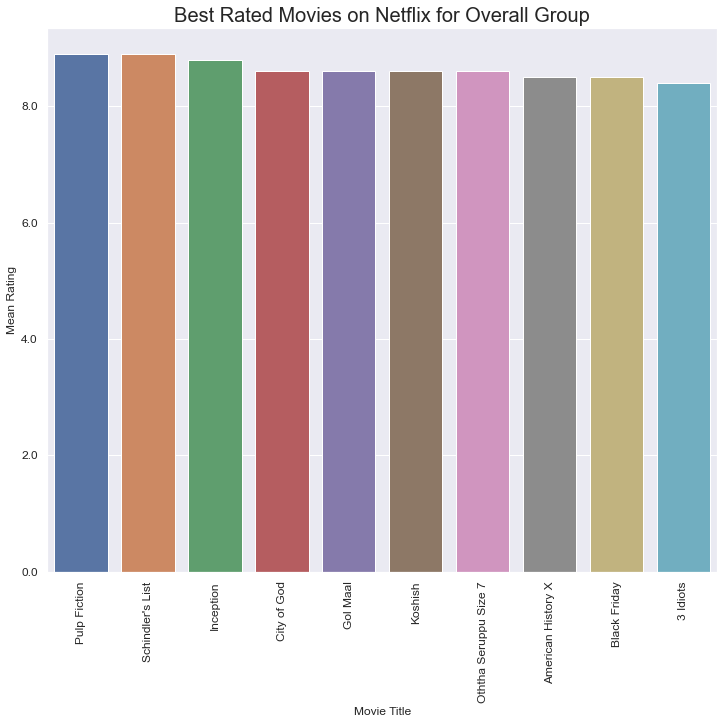

In [11]:
top10('weighted_average_vote','Overall')

1 Inception 7.85
2 Pulp Fiction 7.7
3 Django Unchained 7.23
4 Schindler's List 7.14
5 Black Panther 6.89
6 Taxi Driver 6.86
7 The Irishman 6.77
8 American Beauty 6.65
9 American History X 6.62
10 The Social Network 6.6


<ipython-input-10-d6854e68dad4>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels(ax.get_yticks(),size=12)


<AxesSubplot:title={'center':'Best Rated Movies on Netflix for Under 18 Group'}, xlabel='Movie Title', ylabel='Mean Rating'>

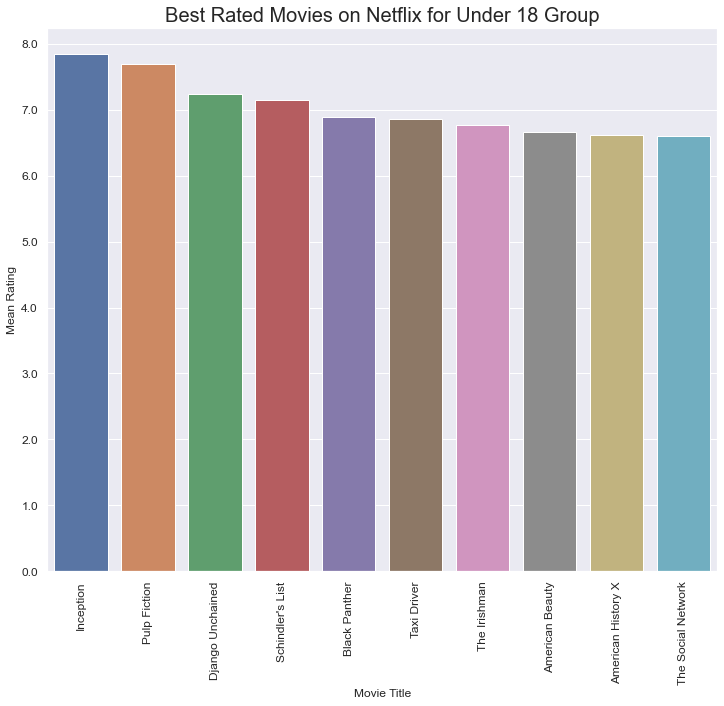

In [12]:
top10('weighted_allgenders_0age','Under 18')

1 Pulp Fiction 8.9
2 Schindler's List 8.89
3 Inception 8.7
4 City of God 8.59
5 American History X 8.49
6 Django Unchained 8.39
7 Gol Maal 8.37
8 American Beauty 8.29
9 Black Friday 8.2
10 Taxi Driver 8.19


<ipython-input-10-d6854e68dad4>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels(ax.get_yticks(),size=12)


<AxesSubplot:title={'center':'Best Rated Movies on Netflix for 30 Group'}, xlabel='Movie Title', ylabel='Mean Rating'>

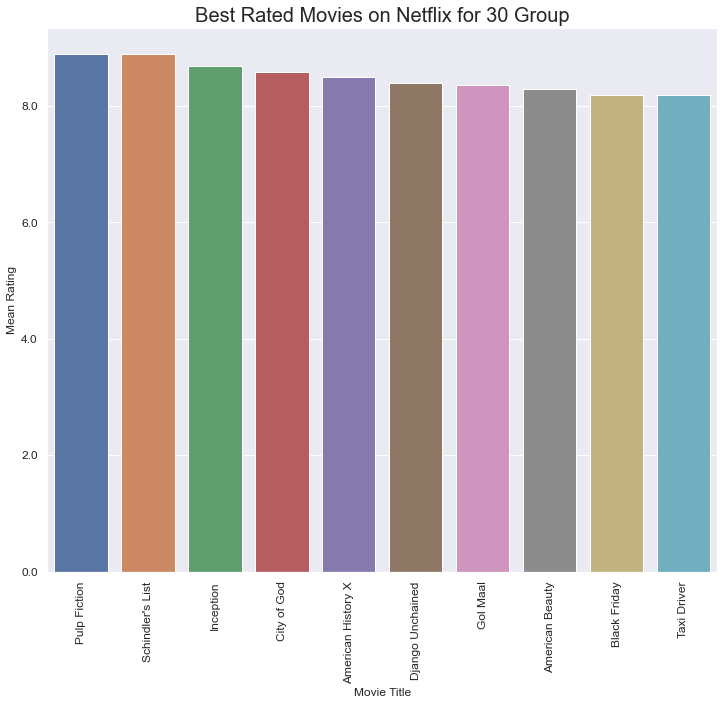

In [13]:
top10('weighted_allgenders_30age','30')

### Top Movies by Genre

In [15]:
def genretop10(genre_string,col,age_group):
    titles = []
    scores = []
    genre = []
    for i in range(len(nf_final)):
        row = nf_final.iloc[i]
        if genre_string in row['listed_in']:
            genre.append(row)
    genre = pd.DataFrame(genre).reset_index(drop=True)
    top10 = genre[col].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.values[i]
        title = genre.iloc[index]['title']
        titles.append(title)
        scores.append(score)
        print(i+1,title,score)
    sns.set(rc={'figure.figsize':(12,10)})
    ax = sns.barplot(x=titles,y=scores)
    ticks = ax.set_xticklabels(titles, rotation=90, size = 12)
    ticks = ax.set_yticklabels(ax.get_yticks(), size = 12)
    ax.set(xlabel='Movie Title', ylabel='Mean Rating')
    ax.set_title('Best Rated'+ genre_string + f' for {age_group} Group',size=20)
    return ax

1 Inception 8.8
2 Django Unchained 8.4
3 Andaz Apna Apna 8.2
4 A Wednesday 8.1
5 Platoon 8.1
6 Rocky 8.1
7 Casino Royale 8.0
8 Company 8.0
9 Ip Man 8.0
10 District 9 7.9


<ipython-input-15-d4797380d6cc>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks = ax.set_yticklabels(ax.get_yticks(), size = 12)


<AxesSubplot:title={'center':'Best RatedAction for Overall Group'}, xlabel='Movie Title', ylabel='Mean Rating'>

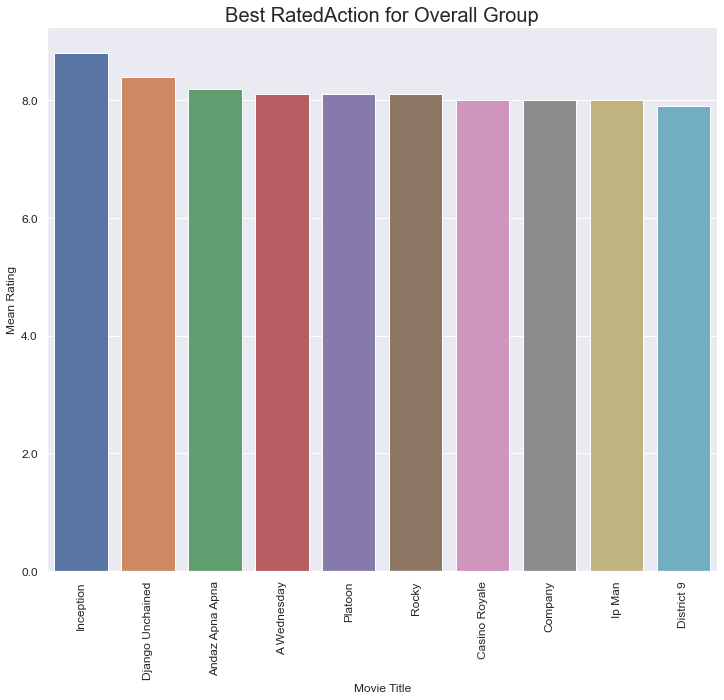

In [16]:
genretop10('Action','weighted_average_vote','Overall')

#### Distribution of Ratings for Different Genres

In [17]:
subframe = []
first_genre_list = []
for i in range(len(nf_final)):
    row = nf_final.iloc[i]
    if 'Horror' in row['listed_in']:
        first_genre_list.append('Horror')
        subframe.append(row)
    elif 'Comedies' in row['listed_in']:
        first_genre_list.append('Comedy')
        subframe.append(row)
    elif 'Children & Family Movies' in row['listed_in']:
        first_genre_list.append('Family')
        subframe.append(row)
    elif 'Romantic' in row['listed_in']:
        first_genre_list.append('Romance')
        subframe.append(row)
    elif 'Action' in row['listed_in']:
        first_genre_list.append('Action')
        subframe.append(row)
#
subframe = pd.DataFrame(subframe)
subframe['first_genre'] = first_genre_list

display(subframe.head(10))

# for i in range(len(nf_final)):
#     split = nf_final.iloc[i]['country'].split(',')
#     nf_final.iloc[i]['country'] = split[0]
#     if nf_final.iloc[i]['country'] == 'Soviet Union':
#         nf_final.iloc[i]['country'] = 'Russia'


# null = merged[merged.isnull().any(axis=1)]
# my_list = ['United Kingdom','India','India','Japan']
# i = 0
# while i < len(my_list):
#     for idx, val in null.iterrows():
#         null.loc[idx,'country'] = my_list[i]
#         i += 1

,title,country,year,listed_in,weighted_average_vote,weighted_allgenders_0age,weighted_allgenders_18age,weighted_allgenders_30age,weighted_allgenders_45age,first_genre
0,23:59,Singapore,2011,"Horror Movies, International Movies",4.6,5.895105,5.725088,5.623970,5.689465,Horror
1,9,United States,2009,"Action & Adventure, Independent Movies, Sci-Fi...",7.1,5.981640,7.055726,6.984109,7.017298,Action
3,1920,India,2008,"Horror Movies, International Movies, Thrillers",6.4,5.904096,6.177766,6.109886,5.840917,Horror
4,Æon Flux,United States,2005,"Action & Adventure, Sci-Fi & Fantasy",5.5,5.876529,5.432285,5.407310,5.709869,Action
5,3 Days to Kill,"United States, France, Serbia",2014,Action & Adventure,6.2,5.914145,6.367097,6.094932,6.273066,Action
6,3 Idiots,India,2009,"Comedies, Dramas, International Movies",8.4,6.549453,8.673591,8.177654,7.082767,Comedy
7,30 Minutes or Less,United States,2011,"Action & Adventure, Comedies",6.1,5.896525,6.187516,6.095883,5.811881,Comedy
10,A Cinderella Story,"United States, Canada",2004,"Children & Family Movies, Comedies",5.9,5.887356,6.093304,5.610736,5.582559,Comedy
11,A Glimpse Inside the Mind of Charles Swan III,United States,2012,"Comedies, Independent Movies",4.8,5.900200,5.575059,5.169324,5.246979,Comedy
12,A Love Story,Philippines,2007,"Dramas, International Movies, Romantic Movies",6.4,0.000000,5.910029,5.927410,5.905015,Romance
